# Evaluation Methods for Classification Problems

> In this post, we will have a look at some evaluation metrics for classification problems in machine learning.

- toc: true
- badges: true
- comments: true
- categories: [jupyter]
- image: images/classification_evaluation_image.png

## Confusion Matrix







Confusion Matrix is a table where we can clearly see the predicted categories and actual categories. The confusion matrix for a binary classification looks like this:

![Binary Confusion Matrix](https://drive.google.com/uc?export=view&id=109HQTfPNtzPb0t9BRdVpqv6hfU4epn-d)


**True positives (TP):** Predicted positive and are actually positive.

**False positives (FP):** Predicted positive and are actually negative.

**True negatives (TN):** Predicted negative and are actually negative.

**False negatives (FN):** Predicted negative and are actually positive.




To calculate the confusion matrix, we will be using the ConfusionMatrixDisplay class from the sklearn library. 


[Documentation for ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

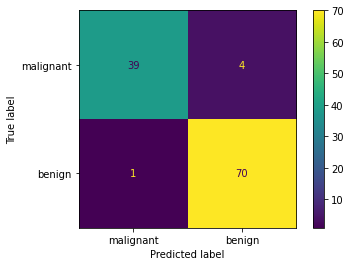

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

X,y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels = ['malignant', 'benign'])


 Depending on some problems, it can be very important to see the number of false negatives or false positives. This is where the confusion matrix comes in very handy because it does exactly that.
 
In this case, we have the precision matrix for the cancer dataset.  We can see that the number of true positives is 39. That means the model was able to identify 39 samples with cancer correctly. 

However, we also have 1 false positive (the patient actually does not have cancer, but the model says the patient has cancer). False positives in this case may not be so critical, since the additional medical controls will later reveal that the patient does not have cancer (except for a few days of difficult days for the patient...).

What is here very critical is the 4 patients who were predicted as cancer-free but they do actually have cancer (false negatives). This is a case we do not want to have at all, since the lives of cancer patients are at stake here. Therefore, for this problem, we would aim for least possible number of false negatives. For another problem, reducing the number of false positives could be more important. This is why the confusion matrix is very important when it comes to classification problems.

### Confusion Matrix for Multi-class Classification



The confusion matrix becomes larger as we move form a binary classification problem to a multi-class classification problem. This is how a confusion matrix for a multi-class problem would look like:

![Multi-class Confusion Matrix](https://drive.google.com/uc?export=view&id=1Sq5eOUWFVvAqMQo9C8FUvEGMdWnNZvwr)

The size of the confusion matrix is same as the number of target categories. One big advantage of confusion matrix is that, it allows us to see how many samples of which class were misclassified, and which predicted class was confused with which actual class.


 

## Accuracy

Accuracy is a measure of how often the classifier makes a correct prediction. It is the ratio of total correct predictions to the total predictions.

$$ \text{Accuracy} = \frac{\text{TP + TN}}{TP + TN + FP + FN} $$

Accuracy is a easy to understand metric and can be very useful when the dataset is balanced. However, it can be misleading when evaluating imbalanced datasets. When target classes in dataset have a large differences in terms of samples, it is an **imbalanced dataset**. Accuracy is not the best metric to use when dealing with imbalanced datasets. Let's have a look at the example below.

![Accuracy for Imbalanced Dataset](https://drive.google.com/uc?export=view&id=1KICPkgT3U9FQ5FDsnCNvSVLwtDRBBH4z)

When we look at the confusion matrix carefully, we see that we have only 25 patients who actually have cancer, in comparison to 375 who do not actually have cancer. The model performs pretty well with an accuracy of 0.95, or is it? Not really, the model is pretty good at predicting the patients who do not have cancer, but we can not say the same for the patients who actually have cancer (only predicted 10 out of 25 who actually have cancer correctly). Because the accuracy only considers the ratio of correct predictions to total predictions, the most frequent class performance dominates the metric, leading to misleading interpretation of model performance when we have an imbalanced dataset.


To calculate accuracy we will be using the accuracy_score function from the sklearn library.


[Documentation for accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
# first we need to make some predictions to be able to calculate our metrics
y_pred = clf.predict(X_test)

#calling the accuracy_score function from metrics
accuracy_score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy score is: {:.2f}".format(accuracy_score))


Accuracy score is: 0.96


In [ ]:
# calculating the accuracy manually
correct_predictions = [pred for i,pred in enumerate(y_pred) if pred == y_test[i]]

accuracy_manual = len(correct_predictions)/len(y_pred)

print("Accuracy score is: {:.2f}".format(accuracy_manual))

Accuracy score is: 0.96


## Precision

Precision is the measure of the ratio of true positive predictions to the total positive predictions of the model.
Precision is a useful metric in cases where false positives are more significant than false negatives. SUch cases can be recommendation systems where a false positives can lead to customer churn which in turn reduces business success.

$$ \text{Precision} = \frac{\text{TP}}{TP + FP} $$

![Accuracy for Imbalanced Dataset](https://drive.google.com/uc?export=view&id=1pHlSP8Lft6oy8RKAqqodVDZv2vJvCKPc)


The precision from our previous example would be:
$$ \text{Precision} = \frac{10}{10 + 5} = 0.667 $$ 

Not as good as the accuracy right? 
In this case false negatives are more important than false positives, we do not want to misdiagnose any cancer patient as negative if they actually have cancer! We also a have a metric for that, Recall!


To calculate accuracy we will be using the precision_score function from the sklearn library.


[Documentation for precision_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [ ]:
#calling the precision_score function from metrics
precision_score = metrics.precision_score(y_test, y_pred)

print("Precision score is: {:.2f}".format(precision_score))

Precision score is: 0.95


In [ ]:
#calculating precision manually
TP = [pred for i,pred in enumerate(y_pred) if (pred == y_test[i] & pred == 1)]
TP_FP = [pred for i,pred in enumerate(y_pred) if (pred == 1)]

precision_manual = len(TP) / len(TP_FP)

print("Precision score is: {:.2f}".format(precision_manual))

Precision score is: 0.95


## Recall

Recall is the ratio of how many of the positive cases the model was able to correctly predict. Recall is a useful metric when false negatives are more significant than false positives. Like we mentioned, it is, for example, important in medical cases (like we have with cancer dataset) where we do not want to miss any actual positives whereas false alarms (false positives) can be considered less important.


$$ \text{Recall} = \frac{\text{TP}}{TP + FN} $$

![Accuracy for Imbalanced Dataset](https://drive.google.com/uc?export=view&id=1yjal9WeFppfD8_9Qs7eLYSoBKztSItGC)


The recall from our previous example would be:
$$ \text{Recall} = \frac{10}{10 + 15} = 0.4 $$

As we can see our recall is much morse compared to accuracy and precision, which, in this case is actually the most important metric. Here we can clearly see how using accuracy for imbalanced datasets can be very misleading.

To calculate accuracy we will be using the recall_score function from the sklearn library.


[Documentation for recall_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

In [ ]:
#calling the recall_score function from metrics
recall_score = metrics.recall_score(y_test, y_pred)

print("Recall score is: {:.2f}".format(recall_score))

Recall score is: 0.99


In [ ]:
#calculating recall manually
TP = [pred for i,pred in enumerate(y_pred) if (pred == y_test[i] & pred == 1)]
TP_FN = [pred for i,pred in enumerate(y_pred) if (y_test[i] == 1)]

recall_manual = len(TP) / len(TP_FN)

print("Precision score is: {:.2f}".format(recall_manual))

Precision score is: 0.99


##F1-Score

F1- score is a combination of both precision and recall. It is the harmonic mean of precision and recall and is maximum when precision is equal to recall. So when we are looking for the best of both worlds (when we have no difference of significance between false positives and false negatives) f1 is our metric.

$$ \text{F1-Score} = \frac{2 * \text{Precision}*\text{Recall}}{Precision + Recall} $$

The F1-score from our previous example would be:
$$ \text{F1-Score} = \frac{2 *0.667*0.4}{0.667 + 0.40} = 0.5 $$

F1-score penalizes the extreme values more and is an effective metric when adding more data with no effect on outcome or when we have a high number of true negatives. It is also a better option to use compared to accuracy when we are dealing with imbalanced data.

To calculate accuracy we will be using the f1_score function from the sklearn library.


[Documentation for f1_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

In [ ]:
#calling the f1_score function from metrics
f1_score = metrics.f1_score(y_test, y_pred)

print("F1-score is: {:.2f}".format(f1_score))

F1-score is: 0.97


In [ ]:
#calculating precision manually
f1_manual = 2*precision_manual*recall_manual/(precision_manual + recall_manual)

print("F1-score is: {:.2f}".format(f1_manual))

F1-score is: 0.97


## Precision-Recall Curve ( PR Curve)

PR curve is a graph illustrating the change of precision values with respect to the recall value for binary classification. PR curve is plotted by calculating the precision and recall values for different thresholds for a classifier and plotting the values. Ex. for logistic regression the threshold would be the predicted probability of a prediction belonging to the positive class.

It is often used in problems with imbalanced dataset. We have the precision values on the y-axis and the recall values on the x-axis. We saw in earlier examples for which use cases precision and recall metrics maybe suitable. Well, the PR curve allows us to consider both metrics and the change of one with respect to other.

Considering both precision and recall can be useful when we have an imbalance of samples between the two target classes. This is specially the case, when samples of negative class ( class 0) are more than then samples of positive class (class 1). Both precision and recall do not consider the number of true negatives and focus on the correct of false prediction of the positive class.

To plot the pr-curve for a classifier, we will be using the precision_recall_curve() function from the sklearn library.



[Documentation for precision_recall_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

We can obtain the probabilities using the predict_proba() method, and then use these probabilities to construct the PR curve. The decision threshold is usually 0.5. This means if probability is larger than 0.5, then it will be predicted as positive. 

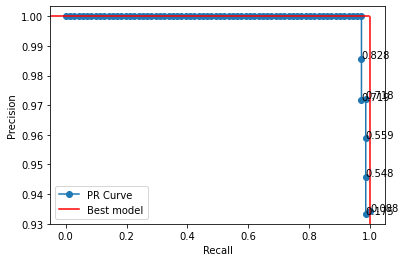

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

probabilities = clf.predict_proba(X_test)[:,1]

precision_vals,recall_vals,thresholds = precision_recall_curve(y_test, probabilities)

plt.plot(recall_vals, precision_vals, label = 'PR Curve', marker='o')
for i,val in enumerate(precision_vals):
  if precision_vals[i] != precision_vals[-1]:
    plt.text(recall_vals[i], val, str(round(thresholds[i],3)), fontsize=10)
plt.axvline(x=1,ymin=0, ymax=0.95, color='r', label="Best Model")
plt.axhline(y=1, xmin=0, xmax=0.95, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['PR Curve', 'Best model'], loc = 'best')

plt.show()


Here we have calculated the precision and recall values for each threshold and plotted them. The red lines represent what a perfect classifier would look like. Our PR curves also seems to be performing pretty well. On each marker we can also see the associated threshold probability value. We want to choose the threshold which lies closer the our red line of perfection. Here depending which metric we are aiming to maximimize, we can choose the threshold according to that. If we have no preference for recall or precision, We can also calculate the f1-score for each threshold and make a selection according to that.

In [ ]:
f1_score = (2 * precision_vals * recall_vals) / (precision_vals + recall_vals)

f1_score

array([0.96598639, 0.95890411, 0.96551724, 0.97222222, 0.97902098,
       0.97183099, 0.9787234 , 0.98571429, 0.97841727, 0.97101449,
       0.96350365, 0.95588235, 0.94814815, 0.94029851, 0.93233083,
       0.92424242, 0.91603053, 0.90769231, 0.89922481, 0.890625  ,
       0.88188976, 0.87301587, 0.864     , 0.85483871, 0.84552846,
       0.83606557, 0.82644628, 0.81666667, 0.80672269, 0.79661017,
       0.78632479, 0.77586207, 0.76521739, 0.75438596, 0.74336283,
       0.73214286, 0.72072072, 0.70909091, 0.69724771, 0.68518519,
       0.6728972 , 0.66037736, 0.64761905, 0.63461538, 0.62135922,
       0.60784314, 0.59405941, 0.58      , 0.56565657, 0.55102041,
       0.53608247, 0.52083333, 0.50526316, 0.4893617 , 0.47311828,
       0.45652174, 0.43956044, 0.42222222, 0.40449438, 0.38636364,
       0.36781609, 0.34883721, 0.32941176, 0.30952381, 0.28915663,
       0.26829268, 0.24691358, 0.225     , 0.20253165, 0.17948718,
       0.15584416, 0.13157895, 0.10666667, 0.08108108, 0.05479

In [ ]:
import numpy as np
ix = np.argmax(f1_score)
print('Best Threshold=%f, F1-Score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.851244, F1-Score=0.986


##ROC Curve (Receiver Operating Characteristic Curve)

 A ROC curve is a plot indicating the performance of a classification model for different classification thresholds by plotting True Positive Rate (Recall) against the False Positive Rate (FPR). It has a similar idea to PR Curve but we plot the FPR instead of precision in this curve.

 $$ \text{FPR} = \frac{\text{FP}}{FP + TN} $$


To plot the ROC-curve for a classifier, we will be using the roc_curve() function from the sklearn library.



[Documentation for roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

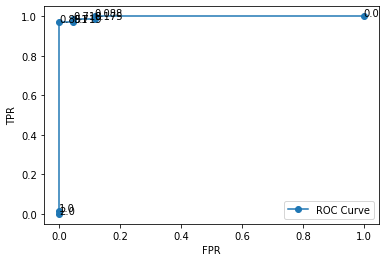

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

plt.plot( fpr, tpr,  label = 'ROC Curve', marker='o')
for i,val in enumerate(tpr):
    plt.text(fpr[i], val, str(round(thresholds[i],3)), fontsize=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'best')
plt.show()

By lowering the classification threshold, more predictions are identified as positive. This increases both false positivi and true positive rates. Therefore, the curve looks different to that of a PR curve. 

In ROC curve, we are looking for the ideal point which is closest to the top left corner. Having a number to estimate how close our curve is to the top left corner would be useful right? Area Under the Curve (AUC) is another method which can help us here.

## Area Under the Curve (AUC)

AUC / Area Under the Curve is the entire two dimensional area under the ROC curve. AUC helps us summarise the information from a ROC curve (can also be used for PR curve) into a single value.

ROC curve is basically a curve of probabilities (threholds) and AUC basically is the measure of separability of the calsses. It tells us how well the model is able to predict the classes. Therefore, a higher AUC value means a better classifier. AUC value varies between 0 and 1, meaning a value of 1 would mean a perfect classifier.

To calculate the AUC score for roc, we will use the roc_auc_score() function from sklearn library.



[Documentation for roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

Before continuing, let's plot our ROC-curve again to examine the area under the curve visually.

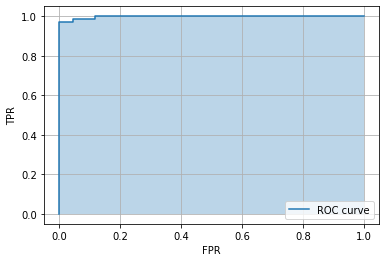

In [ ]:
plt.plot( fpr, tpr,  label = 'ROC curve')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'best')
plt.grid()
plt.show()




A classifier model which can not discriminate between the two classes (a no-skill classifier) would predict the most frequent occuring class or a random class for all predictions and it would have an AUC of 0.5. Its ROC curve would be a diagonal line as below. A classifier which predicts wrong all the time (0% correct prediction) would look exactly opposite of the best curve.

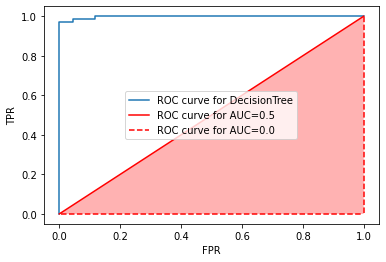

In [ ]:
from sklearn.metrics import roc_curve

pnt_1 = [0, 1]
pnt_2 = [0, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot( fpr, tpr,  label = 'ROC curve for DecisionTree')
plt.plot( pnt_1, pnt_2,  label = 'ROC curve for AUC=0.5', color='r')
plt.fill_between( pnt_1, pnt_2, alpha=0.3, facecolor='r')
plt.axvline(x=1,ymin=0.05, ymax=0.95, color='r', linestyle='--', label="ROC curve for AUC=0.0")
plt.axhline(y=0, xmin=0.05, xmax=0.95, color='r', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc = 'best')
plt.show()

We can use the roc_auc_score function from the sklearn library to calculate the ROC AUC score for the plot above

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, probabilities)

0.9977071732721913




Advantages:

*   AUC is invariant to scale. It is a measure of how good the predictions are ranked, rather than their absolute values.
*   AUC is invariant to classification-threshold. It is a measure of the model's performance (correctness of predictions) irrespective of the classification threshold chosen.

Disadvantages:

*   Invariance to scale is not always wanted. Sometimes we need the well adapted oribability outputs.
*   Invariance to threshold is not always wanted as well. When there are big differences in terms of false negatives and false positives, we may want to aim to minimize only one of these. For example, in out cancer example previously, we mentioned how important it is to minimize the false negatives. In this case, AUC will not be a usefull metric.





## PR Curve vs ROC Curve
*  ROC curves are suitable when we are dealing with more of a balanced dataset, whereas PR curves are suitable for imbalanced datasets.

*   The PR cuve does not consider the true negatives, therefore it is a useful metric when we have an imbalanced dataset, if the negative class is the majority class, considering making correct negative predictions are not that critical for the problem.
*   Since ROC curve also takes the true negatives into consideration, it is a better metric to use if the when also the negative class is important (when both TP and TN are important).

